In [ ]:
import os
import json

performances = {}
for experiment in os.listdir('./experiments'):
    base_f1s = []
    target_f1s = []
    folds = []
    for run in os.listdir(f'./experiments/{experiment}'):
        if not os.path.exists(f'./experiments/{experiment}/{run}/metrics.json'):
            continue
        metrics = json.load(open(f'./experiments/{experiment}/{run}/metrics.json'))
        losses = json.load(open(f'./experiments/{experiment}/{run}/losses.json'))

        if 'target_only' in experiment:
            target_model_on_target_val_f1 = losses['target val f1'][metrics['best_base_val_loss_epoch']]
            base_model_on_target_val_f1 = None
        else:
            target_model_on_target_val_f1 = losses['target val f1'][metrics['best_target_val_loss_epoch']]
            base_model_on_target_val_f1 = losses['target val f1'][metrics['best_base_val_loss_epoch']]

        base_f1s.append(base_model_on_target_val_f1)
        target_f1s.append(target_model_on_target_val_f1)
        folds.append(run)
    performances[experiment] = (base_f1s, target_f1s, folds)

# boxplot all performances
import pandas as pd
data = []
for experiment, (base_f1s, target_f1s, folds) in performances.items():
    for base_f1, target_f1, fold in zip(base_f1s, target_f1s, folds):
        data.append({'experiment': experiment, 'model': 'base', 'f1': base_f1, 'fold': fold})
        data.append({'experiment': experiment, 'model': 'target', 'f1': target_f1, 'fold': fold})
df = pd.DataFrame(data)

import seaborn as sns

df_b = df.copy()
df_b = df_b[df_b['fold'].str.contains('fold0')]
df_b = df_b[~(df_b['model'] == 'base')]
df_b.loc[df_b['experiment'].str.contains('full'),'model'] = 'full fine tuning'
df_b.loc[df_b['experiment'].str.contains('target'),'model'] = 'target only'
df_b['experiment'] = df_b['experiment'].str.split('_').str[-3].str.replace('pct','').astype(float)
df_b.rename(columns={'experiment':'target training data percentage'}, inplace=True)
df_b

sns.lineplot(x='target training data percentage', y='f1', hue='model', marker='o', data=df_b)

df_b = df.copy()
df_b = df_b[df_b['fold'].str.contains('fold1')]
df_b = df_b[~(df_b['model'] == 'base')]
df_b.loc[df_b['experiment'].str.contains('full'),'model'] = 'full fine tuning'
df_b.loc[df_b['experiment'].str.contains('target'),'model'] = 'target only'
df_b['experiment'] = df_b['experiment'].str.split('_').str[-3].str.replace('pct','').astype(float)
df_b.rename(columns={'experiment':'target training data percentage'}, inplace=True)
df_b
sns.lineplot(x='target training data percentage', y='f1', hue='model', marker='o', data=df_b)

df_b = df.copy()
df_b = df_b[df_b['fold'].str.contains('fold2')]
df_b = df_b[~(df_b['model'] == 'base')]
df_b.loc[df_b['experiment'].str.contains('full'),'model'] = 'full fine tuning'
df_b.loc[df_b['experiment'].str.contains('target'),'model'] = 'target only'
df_b['experiment'] = df_b['experiment'].str.split('_').str[-3].str.replace('pct','').astype(float)
df_b.rename(columns={'experiment':'target training data percentage'}, inplace=True)
df_b
sns.lineplot(x='target training data percentage', y='f1', hue='model', marker='o', data=df_b)

<Axes: xlabel='target training data percentage', ylabel='f1'>

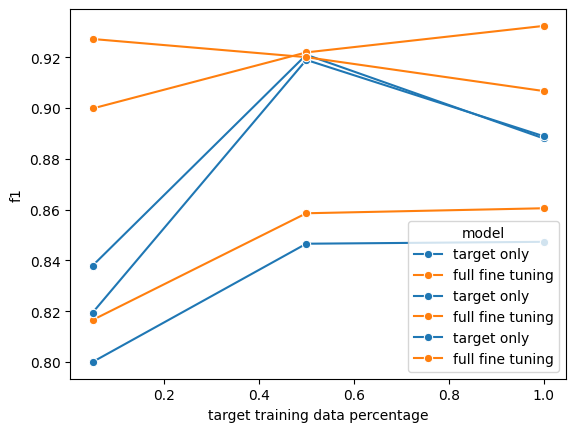

<Axes: xlabel='target training data percentage', ylabel='f1'>

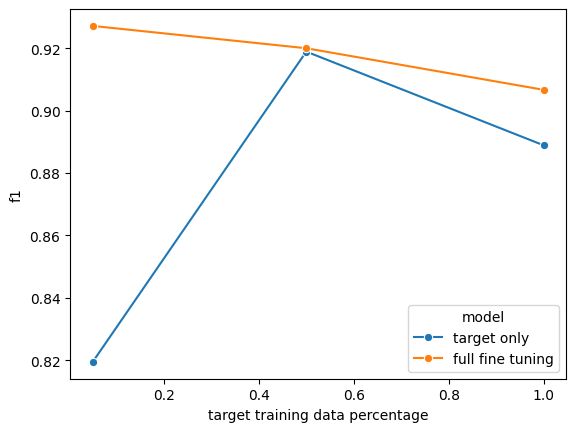

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7.2, 4.48))
sns.boxplot(x='target training data percentage', y='f1', hue='model', data=df_b)
plt.title('Model F1 Scores by Experiment')
plt.ylabel('F1 Score')
plt.xlabel('Experiment')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7.2, 4.48))
df_b = df.copy()
df_b = df_b[df_b['experiment'].str.contains('full')]
df_b['experiment'] = df_b['experiment'].str.split('_').str[-3].str.replace('pct','').astype(float)
sns.boxplot(x='experiment', y='f1', hue='model', data=df_b)
plt.title('Model F1 Scores by Experiment')
plt.ylabel('F1 Score')
plt.xlabel('Experiment')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

In [ ]:
import os
import json

experiment = f'b128_aug_patience5_target_only_20250929_122050'

for run in os.listdir(f'./experiments/{experiment}'):
    metrics = json.load(open(f'./experiments/{experiment}/{run}/metrics.json'))
    losses = json.load(open(f'./experiments/{experiment}/{run}/losses.json'))

    if 'target_only' in experiment:
        custom_target_val_f1 = losses['target val f1'][metrics['best_base_val_loss_epoch']]
        base_target_val_f1 = None
    else:
        custom_target_val_f1 = losses['target val f1'][metrics['best_target_val_loss_epoch']]
        base_target_val_f1 = losses['target val f1'][metrics['best_base_val_loss_epoch']]

    print(f'Run: {run} | Base Model on Target Val F1: {base_target_val_f1} | Custom Model on Target Val F1: {custom_target_val_f1:.4f}')

print('---')
experiment = f'b128_aug_patience5_full_fine_tuning_20250929_112221'

for run in os.listdir(f'./experiments/{experiment}'):
    metrics = json.load(open(f'./experiments/{experiment}/{run}/metrics.json'))
    losses = json.load(open(f'./experiments/{experiment}/{run}/losses.json'))

    if 'target_only' in experiment:
        custom_target_val_f1 = losses['target val f1'][metrics['best_base_val_loss_epoch']]
        base_target_val_f1 = None
    else:
        custom_target_val_f1 = losses['target val f1'][metrics['best_target_val_loss_epoch']]
        base_target_val_f1 = losses['target val f1'][metrics['best_base_val_loss_epoch']]

    print(f'Run: {run} | Base Model on Target Val F1: {base_target_val_f1:.3f} | Custom Model on Target Val F1: {custom_target_val_f1:.4f}')

In [ ]:

performances = {}
    base_f1s = []
    target_f1s = []
    for run in os.listdir(f'./experiments/{experiment}'):
        metrics = json.load(open(f'./experiments/{experiment}/{run}/metrics.json'))
        losses = json.load(open(f'./experiments/{experiment}/{run}/losses.json'))

        if 'target_only' in experiment:
            target_model_on_target_val_f1 = losses['target val f1'][metrics['best_base_val_loss_epoch']]
            base_model_on_target_val_f1 = None
        else:
            target_model_on_target_val_f1 = losses['target val f1'][metrics['best_target_val_loss_epoch']]
            base_model_on_target_val_f1 = losses['target val f1'][metrics['best_base_val_loss_epoch']]

        base_f1s.append(base_model_on_target_val_f1)
        target_f1s.append(target_model_on_target_val_f1)
    performances[experiment] = (base_f1s, target_f1s)

# boxplot all performances
import pandas as pd
data = []
for experiment, (base_f1s, target_f1s) in performances.items():
    for base_f1, target_f1 in zip(base_f1s, target_f1s):
        data.append({'experiment': experiment, 'model': 'base', 'f1': base_f1})
        data.append({'experiment': experiment, 'model': 'target', 'f1': target_f1})
df = pd.DataFrame(data)

In [ ]:
import os
import json

data = []

for experiment in os.listdir('./experiments'):
    print(experiment)
    for run in os.listdir(f'./experiments/{experiment}'):
        metrics = json.load(open(f'./experiments/{experiment}/{run}/metrics.json'))
        base_model_on_target_val_f1 = metrics['best_target_val_f1_from_best_base_model']
        target_model_on_target_val_f1 = metrics['best_target_val_f1']

        data.append({'experiment': experiment, 'inverse relative f1': (target_model_on_target_val_f1 - base_model_on_target_val_f1) / (1 - base_model_on_target_val_f1 + 1e-5)})
        data.append({'experiment': experiment, 'absolute f1': (target_model_on_target_val_f1 - base_model_on_target_val_f1)})
        data.append({'experiment': experiment, 'target f1': (target_model_on_target_val_f1 )})
df = pd.DataFrame(data)

In [ ]:
# long to wide
df_wide = df.pivot_table(index=None, columns='experiment', values=['inverse relative f1', 'absolute f1', 'target f1'], aggfunc='median')
df_wide

In [ ]:
# boxplot df
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(x='experiment', y='target f1', data=df)
plt.title('Model F1 Scores by Experiment')
plt.ylabel('F1 Score')
plt.xlabel('Experiment')
plt.legend(title='Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim([0,1])
plt.show()

In [ ]:
import torch
import os
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from torch import nn
from torch.nn.functional import relu
from torch.utils.data import DataLoader, TensorDataset, ConcatDataset
import matplotlib.pyplot as plt
import math

from utils import SmokingCNN
model = SmokingCNN(window_size=3000, num_features=6)

base_model = SmokingCNN()
base_model.load_state_dict(torch.load(f'results/best_base_model.pt'))

custom_model = SmokingCNN()
custom_model.load_state_dict(torch.load(f'results/best_target_model.pt'))

batch_size = 512
fold = -1
    
data_path = f'data/001_test'
participants = ['alsaad','anam','asfik','ejaz','iftakhar','tonmoy','unk1','dennis']
target_participant = participants[fold]
participants.remove(target_participant)

base_train_dataset = ConcatDataset([TensorDataset(*torch.load(f'{data_path}/{p}_{s}.pt')) for p in participants for s in ['train', 'val']])
base_val_dataset = ConcatDataset([TensorDataset(*torch.load(f'{data_path}/{p}_test.pt')) for p in participants])

target_train_dataset = TensorDataset(*torch.load(f'{data_path}/{target_participant}_train.pt'))
target_val_dataset = TensorDataset(*torch.load(f'{data_path}/{target_participant}_val.pt'))
target_test_dataset = TensorDataset(*torch.load(f'{data_path}/{target_participant}_test.pt'))

base_valloader = DataLoader(base_val_dataset, batch_size=batch_size)
target_trainloader = DataLoader(target_train_dataset, batch_size=batch_size)
target_valloader = DataLoader(target_val_dataset, batch_size=batch_size)
target_testloader = DataLoader(target_test_dataset, batch_size=batch_size)

In [ ]:
from utils import evaluate
evaluate(base_model, target_testloader, device='cuda')
evaluate(custom_model, target_testloader, device='cuda')

In [ ]:
import os
from torch.utils.data import DataLoader, TensorDataset, ConcatDataset
from torch import nn
from utils_simple import compute_loss, optimize_model_and_compute_loss, plot_loss, evaluate
import torch
import matplotlib.pyplot as plt

# Hyperparameters
lr = 3e-3
batch_size = 32
early_stopping_patience = 50
window_size = 3000
data_path = f'data/001_test'
target_participant = 'dennis'

target_train_dataset = TensorDataset(*torch.load(f'{data_path}/{target_participant}_train.pt'))
target_val_dataset = TensorDataset(*torch.load(f'{data_path}/{target_participant}_val.pt'))
target_test_dataset = TensorDataset(*torch.load(f'{data_path}/{target_participant}_test.pt'))

print(f'Target train dataset size: {len(target_train_dataset)}')
print(f'Target val dataset size: {len(target_val_dataset)}')
print(f'Target test dataset size: {len(target_test_dataset)}')

# from utils import SmokingCNN
from utils import SimpleSmokingCNN
model = SimpleSmokingCNN(window_size=window_size, num_features=6)
model.load_state_dict(torch.load('experiments/exp_0012/best_model.pt'))
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
device = 'cuda'

trainloader = DataLoader(target_train_dataset, batch_size=batch_size, shuffle=True)
valloader = DataLoader(target_val_dataset, batch_size=batch_size)
testloader = DataLoader(target_test_dataset, batch_size=batch_size)

evaluate(model, testloader, device=device)